In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import cdstoolbox as ct

@ct.application(title='Download data')
@ct.output.download()
def download_application():
    data = ct.catalogue.retrieve(
        'reanalysis-era5-land',
        {
            'variable': [
                '2m_temperature', 'total_precipitation', 'volumetric_soil_water_layer_1',
            ],
            'year': '2019',
            'month': '12',
            'day': [
                '01', '02', '03',
                '04', '05', '06',
                '07', '08', '09',
                '10', '11', '12',
                '13', '14', '15',
                '16', '17', '18',
                '19', '20', '21',
                '22', '23', '24',
                '25', '26', '27',
                '28', '29', '30',
                '31',
            ],
            'time': '12:00',
        }
    )
    return data

In [2]:
dset = xr.open_dataset("download1.nc")
print(dset)

<xarray.Dataset>
Dimensions:    (latitude: 1801, longitude: 3600, time: 7)
Coordinates:
  * longitude  (longitude) float32 0.0 0.1 0.2 0.3 ... 359.6 359.7 359.8 359.9
  * latitude   (latitude) float32 90.0 89.9 89.8 89.7 ... -89.8 -89.9 -90.0
  * time       (time) datetime64[ns] 2019-12-01T12:00:00 ... 2019-12-07T12:00:00
Data variables:
    t2m        (time, latitude, longitude) float32 ...
    tp         (time, latitude, longitude) float32 ...
    swvl1      (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-11-30 09:00:13 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...


In [3]:
# Total precipitation
print(dset['tp'])

<xarray.DataArray 'tp' (time: 7, latitude: 1801, longitude: 3600)>
[45385200 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 0.0 0.1 0.2 0.3 ... 359.6 359.7 359.8 359.9
  * latitude   (latitude) float32 90.0 89.9 89.8 89.7 ... -89.8 -89.9 -90.0
  * time       (time) datetime64[ns] 2019-12-01T12:00:00 ... 2019-12-07T12:00:00
Attributes:
    units:      m
    long_name:  Total precipitation


In [4]:
dset.head()

<xarray.Dataset>
Dimensions:    (latitude: 5, longitude: 5, time: 5)
Coordinates:
  * longitude  (longitude) float32 0.0 0.1 0.2 0.3 0.4
  * latitude   (latitude) float32 90.0 89.9 89.8 89.7 89.6
  * time       (time) datetime64[ns] 2019-12-01T12:00:00 ... 2019-12-05T12:00:00
Data variables:
    t2m        (time, latitude, longitude) float32 ...
    tp         (time, latitude, longitude) float32 ...
    swvl1      (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-11-30 09:00:13 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

In [5]:
# Check the data type and null values present in fields
dset.info()

xarray.Dataset {
dimensions:
	latitude = 1801 ;
	longitude = 3600 ;
	time = 7 ;

variables:
	float32 longitude(longitude) ;
		longitude:units = degrees_east ;
		longitude:long_name = longitude ;
	float32 latitude(latitude) ;
		latitude:units = degrees_north ;
		latitude:long_name = latitude ;
	datetime64[ns] time(time) ;
		time:long_name = time ;
	float32 t2m(time, latitude, longitude) ;
		t2m:units = K ;
		t2m:long_name = 2 metre temperature ;
	float32 tp(time, latitude, longitude) ;
		tp:units = m ;
		tp:long_name = Total precipitation ;
	float32 swvl1(time, latitude, longitude) ;
		swvl1:units = m**3 m**-3 ;
		swvl1:long_name = Volumetric soil water layer 1 ;

// global attributes:
	:Conventions = CF-1.6 ;
	:history = 2020-11-30 09:00:13 GMT by grib_to_netcdf-2.16.0: /opt/ecmwf/eccodes/bin/grib_to_netcdf -o /cache/data9/adaptor.mars.internal-1606726805.1223369-29710-1-4068d167-186e-4f4a-ba75-ae3ef4f2775f.nc /cache/tmp/4068d167-186e-4f4a-ba75-ae3ef4f2775f-adaptor.mars.internal-160672

In [6]:
# Check for missing values
dset.isnull().sum()

<xarray.Dataset>
Dimensions:  ()
Data variables:
    t2m      int32 29895159
    tp       int32 29895159
    swvl1    int32 29895159

 Basic statistics 

In [7]:
median = np.median(np.median(pd.DataFrame(dset.t2m.values[:,:,0]).dropna(axis = 1)))
std = np.std(np.std(pd.DataFrame(dset.t2m.values[:,:,0]).dropna(axis = 1)))
variance = np.var(np.var(pd.DataFrame(dset.t2m.values[:,:,0]).dropna(axis = 1)))
print('median =',median)
print('std =',std)
print('variance =',variance)

median = 284.55008
std = 0.66085446
variance = 3.853351


Fill nan Values

In [8]:
mean_t2m = np.mean(np.mean(pd.DataFrame(dset.t2m.values[:,:,0]).dropna(axis = 1)))
mean_tp = np.mean(np.mean(pd.DataFrame(dset.tp.values[:,:,0]).dropna(axis = 1)))
mean_swvl1 = np.mean(np.mean(pd.DataFrame(dset.swvl1.values[:,:,0]).dropna(axis = 1)))
print('mean_t2m =',mean_t2m)
print('mean_tp =',mean_tp)
print('mean_swvl1 =',mean_swvl1)
temp = dset.t2m.fillna(mean_t2m)
prec = dset.tp.fillna(mean_tp)
volume = dset.swvl1.fillna(mean_swvl1)
print('swvl1 :',dset.swvl1)
print('Volume :',volume)

mean_t2m = 280.37894
mean_tp = 0.00029690098
mean_swvl1 = 0.18585174
swvl1 : <xarray.DataArray 'swvl1' (time: 7, latitude: 1801, longitude: 3600)>
array([[[     nan,      nan, ...,      nan,      nan],
        [     nan,      nan, ...,      nan,      nan],
        ...,
        [0.158244, 0.158139, ..., 0.158665, 0.158443],
        [0.206098, 0.206098, ..., 0.206098, 0.206098]],

       [[     nan,      nan, ...,      nan,      nan],
        [     nan,      nan, ...,      nan,      nan],
        ...,
        [0.158244, 0.158139, ..., 0.158665, 0.158443],
        [0.206098, 0.206098, ..., 0.206098, 0.206098]],

       ...,

       [[     nan,      nan, ...,      nan,      nan],
        [     nan,      nan, ...,      nan,      nan],
        ...,
        [0.158244, 0.158139, ..., 0.158665, 0.158443],
        [0.206098, 0.206098, ..., 0.206098, 0.206098]],

       [[     nan,      nan, ...,      nan,      nan],
        [     nan,      nan, ...,      nan,      nan],
        ...,
        [0.1

Histogram

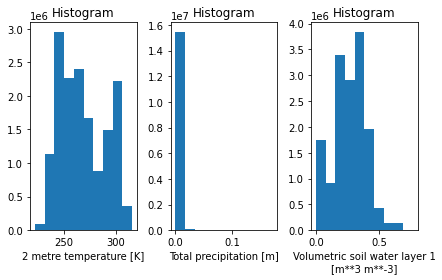

In [9]:
fig, axes = plt.subplots(ncols=3)
dset.t2m.plot(ax=axes[0])
dset.tp.plot(ax=axes[1])
dset.swvl1.plot(ax=axes[2])
plt.tight_layout()
plt.draw()

Plot a randomly chosen day from each of the datasets and use a sequential colormap for the plot.

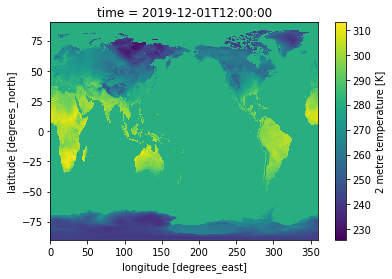

In [10]:
temp.isel(time=0).plot()

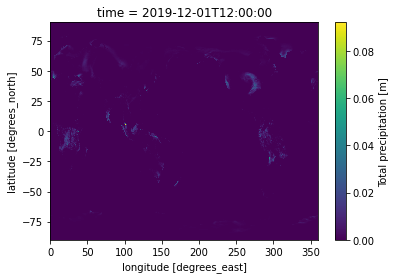

In [11]:
prec.isel(time=0).plot()

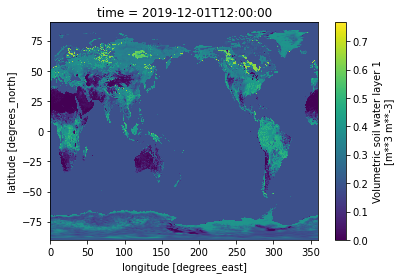

In [12]:
volume.isel(time=0).plot()

Preprocessing Geospatial Data

In [13]:
resolution = 0.05
lon = np.arange(0, 360, resolution)
lat = np.arange(-90, 90+resolution, resolution)

new_data = dset.interp(latitude=lat, longitude=lon)

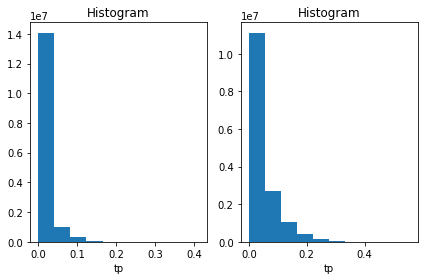

In [14]:
fig, axes = plt.subplots(ncols=2)
np.sqrt(dset.tp).plot.hist(ax=axes[0],bins = 10)
np.cbrt(dset.tp).plot.hist(ax=axes[1],bins = 10)
# np.log(dset.tp).plot.hist(ax=axes[1],bins = 10)
plt.tight_layout()
plt.draw()

Deep Learning for Geospatial Data 

In [15]:
import torch
dtype = torch.float
device = torch.device("cpu")

x1 = dset.t2m.fillna(mean_t2m)
x2 = dset.swvl1.fillna(mean_swvl1)
x = np.concatenate((x1.values,x2.values),axis = 1)
y = dset.tp.fillna(mean_tp).values

In [16]:
N, D_in, H, D_out = 1, 3602, 3602, 1801
e = []
w1 = torch.randn(D_in, H, device=device, dtype=dtype, requires_grad=True)
w2 = torch.randn(H, H, device=device, dtype=dtype, requires_grad=True)
w3 = torch.randn(H, D_out, device=device, dtype=dtype, requires_grad=True)
lr = 1e-8
for t in range(100):
    y_p = torch.tanh(torch.tanh(torch.Tensor(x[0,:,:].T).mm(w1)).mm(w2)).mm(w3)
    loss = (y_p - torch.Tensor(y[0,:,:].T)).pow(2).sum()
#     print(y_p)
    print(t, loss.item())
    e.append(loss.item())
    w1.retain_grad()
    w2.retain_grad()
    w3.retain_grad()

    
    loss.backward()
    with torch.no_grad():
        w1 -= lr * w1.grad
        w2 -= lr * w2.grad
        w3 -= lr * w3.grad

        w1.grad.zero_()
        w2.grad.zero_()
        w3.grad.zero_()


0 23559393280.0


C:\Users\User\anaconda3\envs\cnn\lib\site-packages\torch\autograd\__init__.py:130: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  ..\c10\cuda\CUDAFunctions.cpp:100.)
  Variable._execution_engine.run_backward(


1 11813431296.0
2 6391771136.0
3 3639439616.0
4 2120747392.0
5 1202408704.0
6 649332544.0
7 355508224.0
8 213601232.0
9 117386080.0
10 64413600.0
11 35350368.0
12 19404786.0
13 10656204.0
14 5855991.5
15 3221952.0
16 1776366.375
17 982801.5
18 546965.3125
19 307371.71875
20 175422.828125
21 102521.5703125
22 62040.9140625
23 39427.0078125
24 26721.2890625
25 19543.021484375
26 15449.828125
27 13078.6376953125
28 11668.69921875
29 10796.7421875
30 10229.220703125
31 9834.4755859375
32 9538.7275390625
33 9299.9462890625
34 9093.13671875
35 8903.2685546875
36 8720.0712890625
37 8535.9931640625
38 8344.2744140625
39 8138.0654296875
40 7908.88134765625
41 7647.2685546875
42 7340.77734375
43 6974.75390625
44 6532.474609375
45 6001.197265625
46 5382.2880859375
47 4705.50048828125
48 4034.7900390625
49 3443.680419921875
50 2973.374755859375
51 2621.606689453125
52 2362.7138671875
53 2169.5947265625
54 2021.73828125
55 1904.8165283203125
56 1809.565673828125
57 1730.14990234375
58 1662.23828125

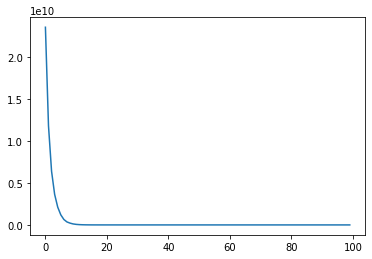

In [17]:
plt.plot(e)
plt.show()

# Q&A